# Time Series Forecasting 

In [2]:
# imports 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error as mae 
# read in csv 
final_merged_df = pd.read_csv('final_merged_df.csv')
# change date to date
final_merged_df['Date'] = pd.to_datetime(final_merged_df['Date'])
# set the date column as index
final_merged_df = final_merged_df.set_index('Date')
# sort the index
final_merged_df = final_merged_df.sort_index()
# get the target variable 
tsla_return = final_merged_df['TSLA_Return']
# split to train and test 80-20 
split_index = int(len(tsla_return) * 0.8)
train = tsla_return.iloc[:split_index]
test = tsla_return.iloc[split_index:]
final_merged_df.head()

,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume,TSLA_Return,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,GSPC_Adj Close,GSPC_Volume,GSPC_Return,change_in_followers,moving_3
Date,,,,,,,,,,,,,,,,
2020-05-13,54.722000,55.066666,50.886665,52.730667,52.730667,285982500,-3.638999,2865.86,2874.14,2793.15,2820.00,2820.00,6151650000,-1.600218,174066.0,NaN
2020-05-19,54.344666,54.804668,53.738667,53.867332,53.867332,144547500,-0.878344,2948.59,2964.21,2922.35,2922.94,2922.94,4984330000,-0.869907,87362.0,NaN
2020-05-26,55.633331,55.639999,54.380669,54.591331,54.591331,121345500,-1.872978,3004.08,3021.72,2988.17,2991.77,2991.77,5848500000,-0.409776,68096.0,NaN
2020-05-28,54.234001,54.983334,53.445999,53.720669,53.720669,108834000,-0.946514,3046.61,3068.67,3023.40,3029.73,3029.73,5447020000,-0.554058,150412.0,NaN
2020-06-04,59.325333,59.716667,57.229332,57.625332,57.625332,133315500,-2.865556,3111.56,3128.91,3090.41,3112.35,3112.35,6451290000,0.025389,505668.0,NaN


# Moving Average 

In [4]:
# moving average
ma_forecast = tsla_return.shift(1).rolling(window=13).mean()
ma_forecast_test = ma_forecast.iloc[split_index:]
ma_mae = mae(test, ma_forecast_test)
 
print(f'Mae for moving avergae: {ma_mae}')

Mae for moving avergae: 3.1319183287710555


# Simple Exp Smoothing a=.5

In [6]:
# import modules 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses = SimpleExpSmoothing(train).fit(smoothing_level=0.5, optimized=False)
forecast_ses = ses.forecast(45)
mae = mae(test, forecast_ses)
print(f' MAE for Exp Smooth with a = .5: {mae}')

 MAE for Exp Smooth with a = .5: 3.9769432565941263


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Additive Exponential Smoothing

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error as mae 

# train and test 
train_ = final_merged_df.iloc[:-179]
test_ = final_merged_df.iloc[-45:]
# additive 
additive = ExponentialSmoothing(train_['TSLA_Return'],trend='add',seasonal='add', seasonal_periods=17).fit()
add_forecast = additive.forecast(len(test))
# calcualte MAE 
add_mae = mae(test_['TSLA_Return'], add_forecast)
# print
print(f'MAE for additive: {add_mae}')

MAE for additive: 4.1284048514710285


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# TBATS

In [10]:
# import modules 
from tbats import TBATS
# find MAE
tbats = TBATS(
    use_box_cox=True, 
    use_arma_errors=True, 
    use_trend=True, 
    use_damped_trend=True,
    seasonal_periods=[20],
    n_jobs=1,
)
tbats_model = tbats.fit(train_['TSLA_Return'])
forecast_tbats = tbats_model.forecast(steps=(len(test)))
mae_tbats = mae(test_['TSLA_Return'], forecast_tbats)
# print
print(f'MAE for TBATS: {mae_tbats}')

/opt/anaconda3/lib/python3.12/site-packages/tbats/error/ExceptionHandler.py:13: InputArgsWarning: Box-Cox transformation (use_box_cox) was forced to True but there are negative values in input series. Setting use_box_cox to False.
  warnings.warn(message, warning_type)


MAE for TBATS: 4.103156789057872


## Moving avergae with n=13 gave us our lowest MAE

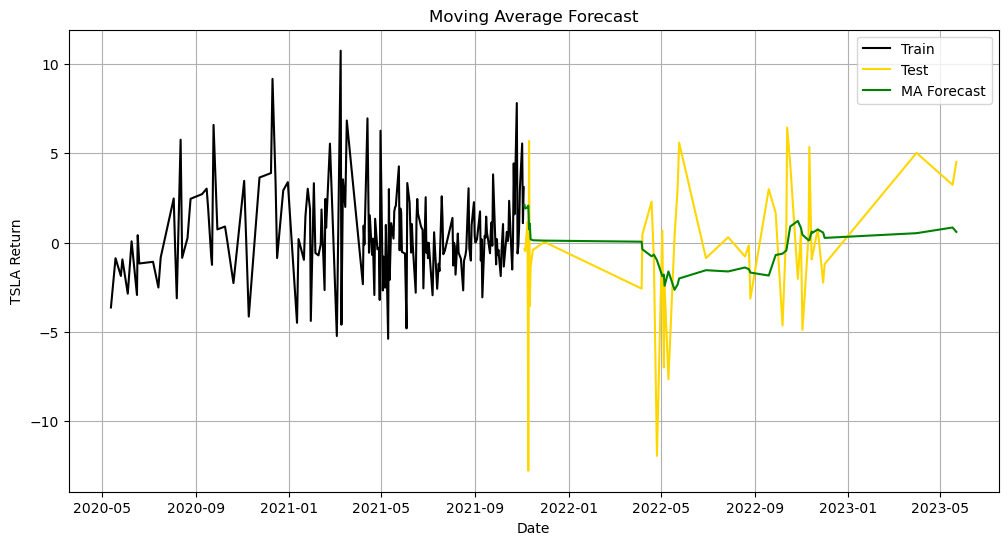

In [12]:
# graph MA n=13
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color = 'black')
plt.plot(test.index, test, label='Test', color='gold')
plt.plot(test.index, ma_forecast_test, label=f'MA Forecast', color='green')
plt.title(f'Moving Average Forecast')
plt.xlabel('Date')
plt.ylabel('TSLA Return')
plt.legend()
plt.grid(True)
plt.show()